In this project we will predict the chances of having lung cancer based of certain symptoms like yellow fingers, anxiety, fatigue, wheezing, coughing, shortness of breath, swallowing difficulty, chest pain. We will use random forest machine learning algorithm for building the model.

### 1. Import Libraries

In [41]:
import pandas as pd  #for data manupulation and analysis
import seaborn as sbn #for data visualization
sbn.set(style='whitegrid', palette = 'deep', rc = {'axes.grid':True})
import matplotlib.pyplot as plt #for creating figure, plotting area, ploting lines, plot with labels etc.
%matplotlib inline #for displaying plotting commands inline within Jupyter notebook, directly below the code cell
from sklearn.model_selection import train_test_split, GridSearchCV #splitting data training and testing data, and loop through predefined hyperparameters and fit model on training set
from sklearn.preprocessing import LabelEncoder #for encode target labels with value between 0 and 1
from sklearn.ensemble import RandomForestClassifier #for fitting a number of decision tree classifiers on various sub-samples of the dataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

### 2. Load data

In [42]:
df = pd.read_csv('F:/Projects/LungCancerPrediction/LungCancer.csv')
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### 3. Exploratory data analyses

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [45]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [46]:
df.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

No null value so we are good

In [48]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

8 Symmtoms of lung cancer : YELLOW_FINGERS, ANXIETY, FATIGUE, WHEEZING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN

### 4. Drop the unwanted columns

In [49]:
df_new = df.drop(['GENDER', 'AGE', 'SMOKING', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'ALLERGY ', 'ALCOHOL CONSUMING'], axis = 1)
df_new.head(4)

,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,2,2,2,2,2,2,YES
1,1,1,2,1,1,2,2,2,YES
2,1,1,2,2,2,2,1,2,NO
3,2,2,1,1,1,1,2,2,NO


In [50]:
symptoms = ['YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
X = df_new[symptoms]
X.head(2)

,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,2,2,2,2,2,2
1,1,1,2,1,1,2,2,2


In [51]:
y = df_new.LUNG_CANCER
y.head(4)

0    YES
1    YES
2     NO
3     NO
Name: LUNG_CANCER, dtype: object

### 5. Splititing the data into training and testing set

The data will be splitted into 80/20. 80% of the data for training the model and 20% of the data would be used for testing the model accuracy. We will use a random_state of 42 so we will always get the same split everytime we run the code.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   YELLOW_FINGERS         309 non-null    int64
 1   ANXIETY                309 non-null    int64
 2   FATIGUE                309 non-null    int64
 3   WHEEZING               309 non-null    int64
 4   COUGHING               309 non-null    int64
 5   SHORTNESS OF BREATH    309 non-null    int64
 6   SWALLOWING DIFFICULTY  309 non-null    int64
 7   CHEST PAIN             309 non-null    int64
dtypes: int64(8)
memory usage: 19.4 KB


### 6. Let's convert target column into a numeric value using sklearn's LabelEncoder

The features of X are numerical values. We will convert the target column into a numeric value using Sklearn's LabelEncoder.

In [53]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### 7. Let's evaluate the distribution of data in the feature columns

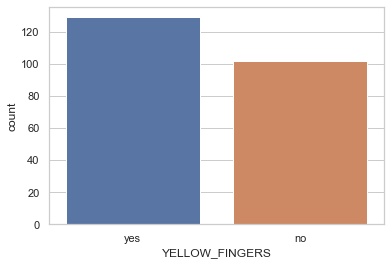

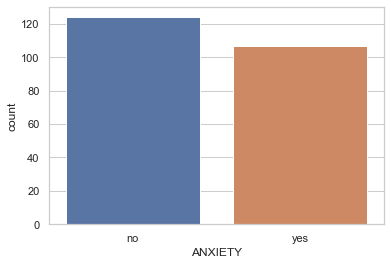

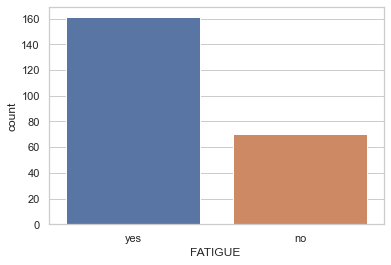

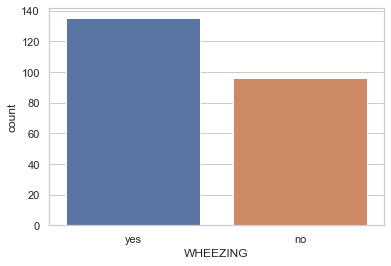

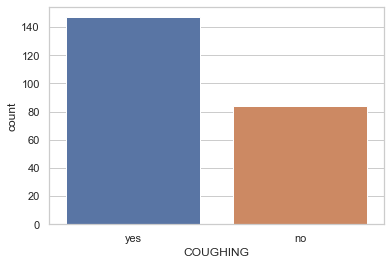

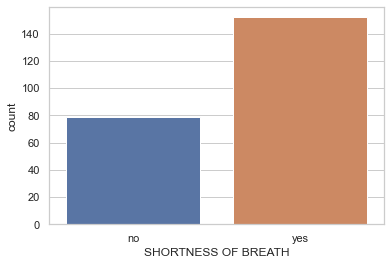

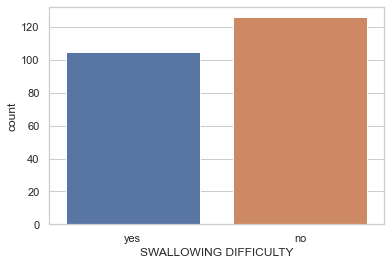

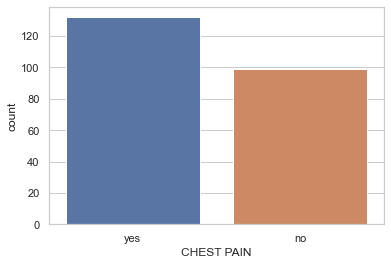

In [54]:
key = {2: 'yes', 1: 'no'}
for sys in symptoms:
    sbn.countplot(x = X_train[sys].replace(key))
    plt.show()

### 8. Evaluate the distribution of data in the target column

<AxesSubplot:ylabel='count'>

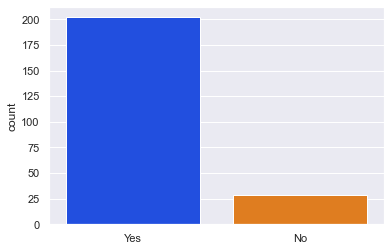

In [55]:
sbn.set(style = 'darkgrid', palette = 'bright')
sbn.countplot(x = pd.Series(y_train).replace([0,1],['No','Yes']))

### 9. Building the random forest model

In [57]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy score of this Random Forest Classifier model is: {0:.1f}%'.format(100*accuracy_score(y_test, y_pred)))

The accuracy score of this Random Forest Classifier model is: 92.3%


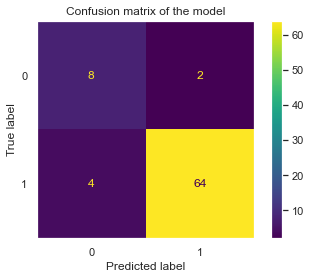

In [58]:
sbn.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

The model predicted positive cases 64 times out of 68 times and correctly pridicted negative cases 8 times out of 10.

In [37]:
print('The precision of this model is {0:.1f}%'.format(100*precision_score(y_test,y_pred)))
print('The recall score of this model is {0:.1f}% ' .format(100*precision_score(y_test,y_pred)))
print('The harmonic mean of the precision score and recall score is:' , f1_score(y_test,y_pred))

The precision of this model is 97.0%
The recall score of this model is 97.0% 
The harmonic mean of the precision score and recall score is: 0.955223880597015


In [39]:
#Features importance
Symptoms_importance = pd.DataFrame({'Symptoms': list(X.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

#Display
print(Symptoms_importance)


                Symptoms  importance
0         YELLOW_FINGERS    0.152723
4               COUGHING    0.150052
7             CHEST PAIN    0.133490
2               FATIGUE     0.124247
3               WHEEZING    0.122971
1                ANXIETY    0.120900
5    SHORTNESS OF BREATH    0.106120
6  SWALLOWING DIFFICULTY    0.089497


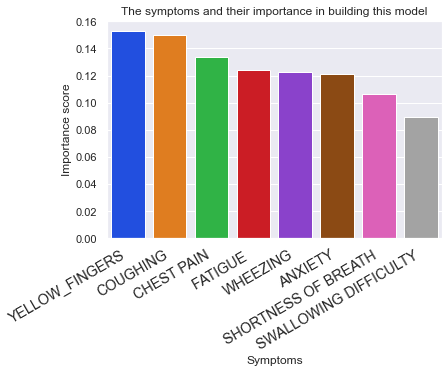

In [68]:
# Create a bar plot
sbn.set(palette = 'bright', rc = {'axes.grid':True})
sbn.barplot(x=Symptoms_importance.Symptoms, y=Symptoms_importance.importance)
plt.xlabel('Symptoms')
plt.ylabel('Importance score')
plt.title('The symptoms and their importance in building this model')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.show()